# 1. Find missing values 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


student_mat = pd.read_csv("student-mat-missing-data.csv")

In [3]:
student_mat
# student_mat.info()
# student_mat.describe()
# student_mat.value_counts()
#student_mat["freetime"].unique()
# student_mat.columns()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


## Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

##  d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

<AxesSubplot:>

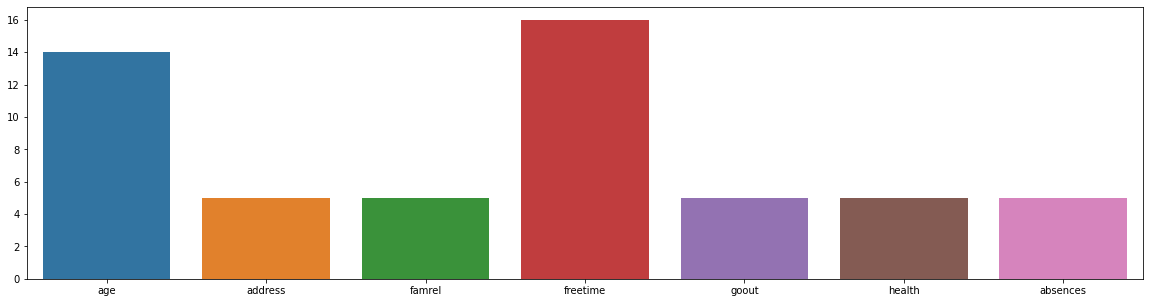

In [4]:
from data_utils import find_missing_values

find_missing_values(student_mat)

## e) Find all rows where the freetime is NaN.

In [5]:
freetime_missing = student_mat["freetime"].isnull()
freetime_missing = freetime_missing[freetime_missing == True]
a = list(freetime_missing.index.values)

##   f) Find all rows where the freetime or the age is NaN.



In [6]:
age_missing = student_mat["age"].isnull()
age_missing = age_missing[age_missing==True]
b=list(age_missing.index.values)
a.extend(b)
list_missing=list(set(a))
sorted(list_missing)



[20,
 71,
 87,
 99,
 102,
 106,
 121,
 130,
 149,
 151,
 160,
 188,
 191,
 214,
 257,
 270,
 276,
 293,
 308,
 330,
 343,
 348,
 359,
 372,
 385]

##   g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.



In [7]:
row_missing = student_mat.isnull().sum(axis=1) #axis=1 means that how many NaN in one row for each column
number_of_rows_have_several_missing = len(row_missing[row_missing > 1].index) 
propotion = number_of_rows_have_several_missing/len(student_mat)
propotion

0.012658227848101266

# 2. Clean the data 

## a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove. Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

<AxesSubplot:>

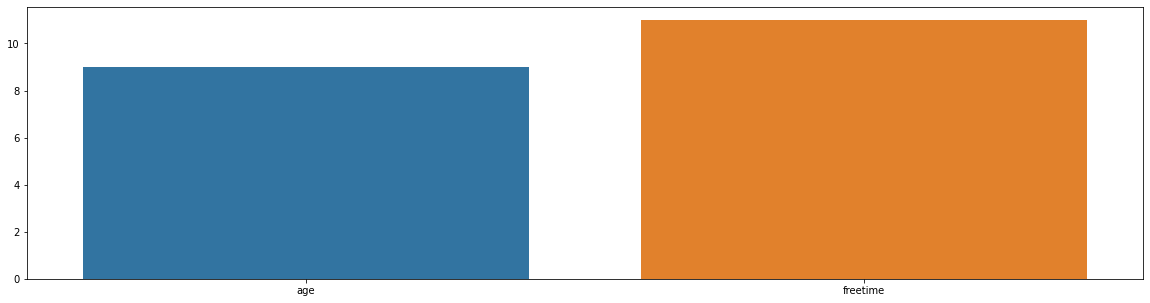

In [9]:
list(row_missing[row_missing > 1].index)
student_mat_droped = student_mat.drop(list(row_missing[row_missing > 1].index),axis=0)
find_missing_values(student_mat_droped)

## b) The domain expert has told you that you have to fill in the missing age values. Start with visualising the age distribution in the dataset using a histogram.

Text(0.5, 1.0, 'Histogram idstribution of age')

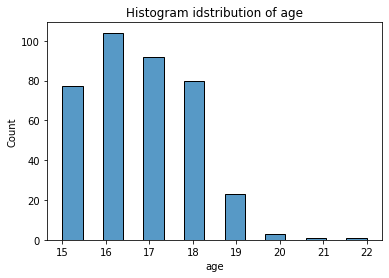

In [18]:
sns.histplot(student_mat_droped["age"], bins = 15).set_title("Histogram idstribution of age")


##   c) Check which columns there are in the dataset to see what can be utilised in determining the age.



In [29]:
student_mat_droped.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## d) The column higher seems interesting. Let's see which unique values it can have.

In [33]:
student_mat_droped["higher"].unique()

array(['yes', 'no'], dtype=object)

## e) Let's see if we can see some connection between age distribution and higher. Make 3 subplots of age histograms:

- Plot 1: same as b)
- Plot 2: age distribution when higher is yes
- Plot 3: age distribution when higher is no


Text(0.5, 1.0, 'Histogram idstribution of age when higher = no')

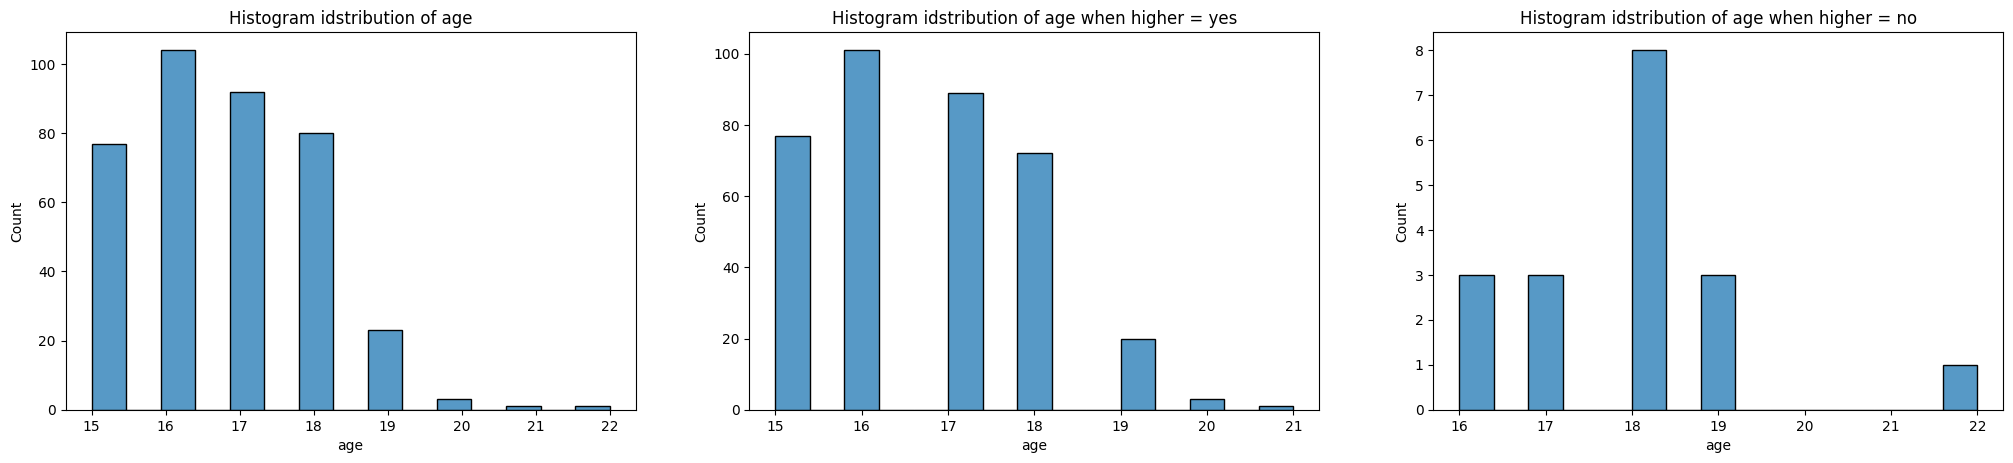

In [39]:
fig, ax = plt.subplots(1,3, dpi=100, figsize=(25,5))

sns.histplot(student_mat_droped["age"], ax = ax[0], bins = 15).set_title("Histogram idstribution of age")
sns.histplot(student_mat_droped["age"][student_mat_droped["higher"]=="yes"], ax = ax[1], bins = 15).set_title("Histogram idstribution of age when higher = yes")
sns.histplot(student_mat_droped["age"][student_mat_droped["higher"]=="no"], ax = ax[2], bins = 15).set_title("Histogram idstribution of age when higher = no")



## f) That was hard to find a connection. When reading dataset source we find alcohol consumption, maybe there is some connection between age and alcohol consumption.

- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

  ## Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns